For one Ei, calculate resolution functions at a bunch of energy transfers

In [1]:
%cd ~/dv/srins/graphite-DOS/notebooks/

/home/lj7/dv/srins/graphite-DOS/notebooks


In [2]:
import numpy as np, os
from matplotlib import pyplot as plt
%matplotlib inline
import histogram.hdf as hh, histogram as H

In [3]:
from dgsres.powder import use_ConstantQEKernel

## Explanation of parameters
* Q=3. If choose center of the dynamic range, Q should be around 3.5. But the coverage of ARCS det system is not very good near that. That is why we use Q=3. See the IQE plot below
* ncount=1e7 and nodes=20 takes about 10min per energy
* dE probably should be around 0.5% of the Ei

plot z in (-0.000135669148887, 0.0009778562455)


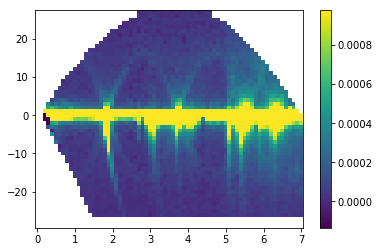

In [6]:
iqe = hh.load('/SNS/users/lj7/simulations/ARCS/graphite/getdos-non-Rad-multiEi-30meV/iqe-interped.h5')
H.plot(iqe)

## Check beam

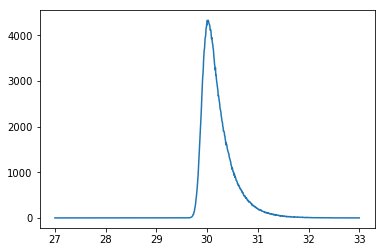

In [13]:
beam_IE = hh.load('/SNS/users/lj7/simulations/ARCS/beam/30meV-n3e9-FC_300-T0_60/out/ienergy.h5')
plt.figure()
plt.plot(beam_IE.energy, beam_IE.I)

## Simulation configuration

In [15]:
sim = use_ConstantQEKernel.Sim(
    workdir = "/SNS/users/lj7/simulations/ARCS/graphite/resolution/Ei_30",
    beamdir = "/SNS/users/lj7/simulations/ARCS/beam/30meV-n3e9-FC_300-T0_60/",
    Ei = 30,
    Q = 3.,
    dQ_axis = (-.5, .5, 0.01),
    dE_axis = (-15, 10, 0.05),
    ncount = 1e7,
    nodes = 20
)

## Test one E

In [16]:
sim.run(E=10.)

In [17]:
ls {sim.workdir}/out

ie-Q_3.0-E_10.0.h5  iqe-Q_3.0-E_10.0.h5


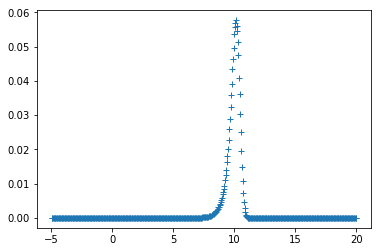

In [18]:
hist = hh.load(os.path.join(sim.outdir, 'ie-Q_3.0-E_10.0.h5'))
plt.plot(hist.E, hist.I, '+')

## Run all Es

In [19]:
%%time
for E in np.arange(0., 30.-1, 3.):
    if os.path.exists(os.path.join(sim.outdir, 'iqe-Q_3.0-E_%s.h5' % E)): continue
    print E
    sim.run(E)

0.0
3.0
6.0
9.0
12.0
15.0
18.0
21.0
24.0
27.0
CPU times: user 900 ms, sys: 288 ms, total: 1.19 s
Wall time: 1h 24min 45s


In [20]:
ls {sim.outdir}

ie-Q_3.0-E_0.0.h5   ie-Q_3.0-E_3.0.h5    iqe-Q_3.0-E_21.0.h5
ie-Q_3.0-E_10.0.h5  ie-Q_3.0-E_6.0.h5    iqe-Q_3.0-E_24.0.h5
ie-Q_3.0-E_12.0.h5  ie-Q_3.0-E_9.0.h5    iqe-Q_3.0-E_27.0.h5
ie-Q_3.0-E_15.0.h5  iqe-Q_3.0-E_0.0.h5   iqe-Q_3.0-E_3.0.h5
ie-Q_3.0-E_18.0.h5  iqe-Q_3.0-E_10.0.h5  iqe-Q_3.0-E_6.0.h5
ie-Q_3.0-E_21.0.h5  iqe-Q_3.0-E_12.0.h5  iqe-Q_3.0-E_9.0.h5
ie-Q_3.0-E_24.0.h5  iqe-Q_3.0-E_15.0.h5
ie-Q_3.0-E_27.0.h5  iqe-Q_3.0-E_18.0.h5


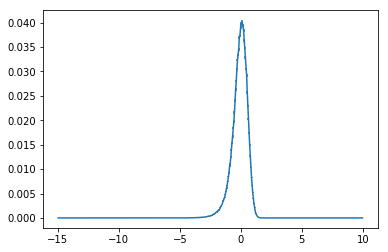

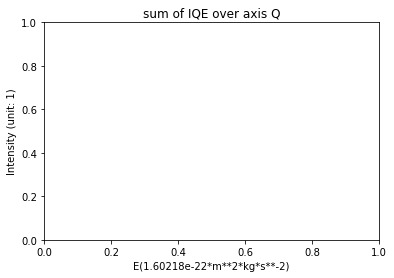

In [21]:
H.plot(hh.load(os.path.join(sim.outdir, 'ie-Q_3.0-E_0.0.h5')))

## Code for Debugging

In [ ]:
%cd {sim.simdir}

In [ ]:
!time mcvine instruments arcs nxs reduce sim.nxs --qaxis 11 13 0.1 --eaxis 210 290 2 --tof2E

In [ ]:
H.plot(hh.load(os.path.join(sim.simdir, 'iqe.h5')), min=0)

In [ ]:
iqe.I[iqe.I!=iqe.I] = 0

In [ ]:
ie = iqe.sum('Q')

In [ ]:
plt.plot(ie.E, ie.I)
plt.show()